<a href="https://colab.research.google.com/github/souradipta93/Social_Media_-_Web_Analytics/blob/main/Text_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd



In [2]:
data1 = pd.read_csv('tweets_covid.csv')

In [3]:
!pip install wordcloud

In [4]:
import seaborn

In [5]:
 data1['text'].head(20)

0     People of the world.!!!!!! BREAKING!!!!!!!\nDo...
1     As if #COVID is not a big enough problem alrea...
2     The cluster at entertainment venues in Bangkok...
3     Thailand discovers 789 new cases of coronaviru...
4     Provinces are introducing different measures t...
5     Thailand discovers 405 new cases of coronaviru...
6     Thailand discovers 559 new cases of coronaviru...
7     Private hospitals given green light to acquire...
8     COVID-19: Vegetable prices expected to soar as...
9     Covid surge: PMO's top priority is to prevent ...
10    India reports 1.45 Lakh new cases, active case...
11    Researchers debunk COVID-19 vulnerability's al...
12    Covid-19: Bahrain sets new rules to be effecti...
13    Night curfew in Lucknow, Kanpur, Varanasi as C...
14    Sarsanghachalak of Rashtriya Swayamsevak Sangh...
15    #Maharashtra : #Covid claims mom’s life, but n...
16    After assurance that their medical college wil...
17    @AUThackeray @VarshaEGaikwad #cancelboarde

In [6]:
data1.shape

(17832, 90)

In [7]:
import nltk
#nltk.download()

In [8]:
#Extract the first review
tweet = data1['text'][12]
tweet

'Covid-19: Bahrain sets new rules to be effective from Eid Al-Fitr #Bahrain #Covid-19updates https://t.co/0vfyNrzv2S'

# Text pre-processing examples

In [9]:
#convert to lowercase
tweet = tweet.lower()
tweet

'covid-19: bahrain sets new rules to be effective from eid al-fitr #bahrain #covid-19updates https://t.co/0vfynrzv2s'

In [10]:
#remove punctuation
import re
tweet = re.sub('[^a-zA-Z]', ' ', tweet)
tweet

'covid     bahrain sets new rules to be effective from eid al fitr  bahrain  covid   updates https   t co  vfynrzv s'

In [11]:
#convert words to tokens
token_tweet=tweet.split(" ")
token_tweet

['covid',
 '',
 '',
 '',
 '',
 'bahrain',
 'sets',
 'new',
 'rules',
 'to',
 'be',
 'effective',
 'from',
 'eid',
 'al',
 'fitr',
 '',
 'bahrain',
 '',
 'covid',
 '',
 '',
 'updates',
 'https',
 '',
 '',
 't',
 'co',
 '',
 'vfynrzv',
 's']

In [14]:
#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#Adding custom stop words
new_words=[]
new_words = ["some","one","like","time","br","movie","film","could","good",'even', 'get', 'would',
             'make', 'really', 'see', 'well', 'much', 'great', 'first', 'people', 'also', 'bad', 
             'show', 'way', 'thing', 'made', 'go', 'think', 'know', 'watch','look','many']
stop_words = stop_words.union(new_words)

In [16]:
#Removing stop words from a text
token_tweet = [w for w in token_tweet if not w in stop_words]
print(token_tweet[:20])

['covid', '', '', '', '', 'bahrain', 'sets', 'new', 'rules', 'effective', 'eid', 'al', 'fitr', '', 'bahrain', '', 'covid', '', '', 'updates']


In [17]:
#Stemming words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in token_tweet]
print(stemmed[:20])

['covid', '', '', '', '', 'bahrain', 'set', 'new', 'rule', 'effect', 'eid', 'al', 'fitr', '', 'bahrain', '', 'covid', '', '', 'updat']


In [20]:
#Lemmatisation
from nltk.stem.wordnet import WordNetLemmatizer 
nltk.download('wordnet')
lm = WordNetLemmatizer() 
lm_review = [lm.lemmatize(word) for word in token_tweet]
print(lm_review[:20])  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['covid', '', '', '', '', 'bahrain', 'set', 'new', 'rule', 'effective', 'eid', 'al', 'fitr', '', 'bahrain', '', 'covid', '', '', 'update']


## Perform text pre-processing in a loop for the whole corpus

In [21]:
corpus = []
for i in range(0, data1.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data1['text'][i])
    
    #Convert to lowercase
    text = text.lower()
    ##Convert to list from string
    text = text.split()
    ##Lemmatizing
    lm = WordNetLemmatizer() 
       
    
    text = [lm.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [22]:
corpus[300]

'night curfew imposed noida pm till april amid worrying surge covid case follow live update http co eyst czbh'

## Creating the term document matrix - toy data

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [24]:
#Lets understand count vectoriser
cv = CountVectorizer()

In [25]:
#Use fit transform to transform a text corpus to a count vectoriser
test_cv = cv.fit_transform(["A wonderful production", 
                            "This was a wonderful way", 
                            "wonderful portrait about human relations"])

test_cv

<3x9 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [26]:
#View cv as an array
count_vect_array = test_cv.toarray()
count_vect_array

array([[0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 0, 1]])

In [27]:
#Get the feature names of cv
cv.get_feature_names()

['about',
 'human',
 'portrait',
 'production',
 'relations',
 'this',
 'was',
 'way',
 'wonderful']

In [28]:
### Convert to dataframe

count_vect_df = pd.DataFrame(count_vect_array, columns=cv.get_feature_names())
count_vect_df

,about,human,portrait,production,relations,this,was,way,wonderful
0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,1,1,1,1
2,1,1,1,0,1,0,0,0,1


In [29]:
#How to get the word frequency for each term in the vocabulary
count_vect_df.sum(axis=0)

about         1
human         1
portrait      1
production    1
relations     1
this          1
was           1
way           1
wonderful     3
dtype: int64

# Create a vocabulary of words for the movie reviews

In [30]:
#ignore words that appear in 80% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.7,
                   stop_words=stop_words, 
                   ngram_range=(1,2), 
                   min_df=0.001)
X=cv.fit_transform(corpus)
vector = cv.transform(corpus)

In [31]:
print(X.shape)

(17832, 3137)


In [32]:
#cv.vocabulary_

## Visualising frequently occuring words

In [33]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

In [35]:
### This df used as a guideline to create custom stop words
top_df.head(10)

,Word,Freq
0,covid,24638
1,co,16281
2,http,16215
3,vaccine,4048
4,amp,2463
5,coronavirus,1832
6,case,1707
7,pandemic,1508
8,new,1332
9,health,1328


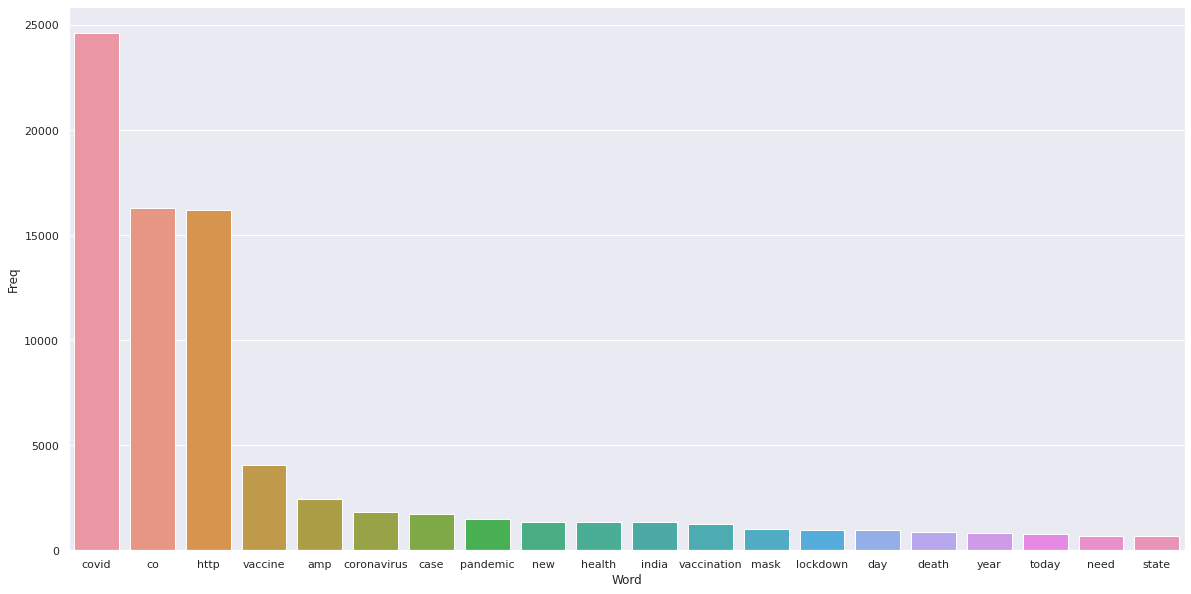

In [36]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="Word", y="Freq",data=top_df)
plt.show()

In [37]:
### Word cloud

In [38]:
#Visualise using word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline



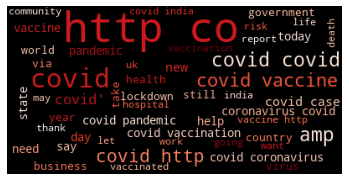

In [39]:
# Create and generate a word cloud image:
wordcloud = WordCloud(
                          background_color='black',
                          colormap="Reds",
                          stopwords=stop_words,
                          max_words=50,
                          max_font_size=50, 
                          random_state=42,
                          ).generate(str(corpus))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [40]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=10)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

             Bi-gram   Freq
0            http co  16209
1        covid covid   2134
2      covid vaccine   1903
3         covid http   1662
4         covid case    774
5     covid pandemic    601
6  covid coronavirus    578
7  coronavirus covid    526
8  covid vaccination    509
9       vaccine http    362


# What are the challenges with Document Frequency Matrix

## TF IDF Vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Lets understand count vectoriser
tf = TfidfVectorizer()

In [42]:
#Use fir transform to transform a text corpus to a count vectoriser
test_tf = tf.fit_transform(["A wonderful production", 
                            "This was a wonderful way", 
                            "wonderful portrait about human relations"])

In [43]:
#View cv as an array
tf_array = test_tf.toarray()
tf_array

array([[0.        , 0.        , 0.        , 0.861037  , 0.        ,
        0.        , 0.        , 0.        , 0.50854232],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.54645401, 0.54645401, 0.54645401, 0.32274454],
       [0.47952794, 0.47952794, 0.47952794, 0.        , 0.47952794,
        0.        , 0.        , 0.        , 0.28321692]])

In [44]:
#Get the feature names of cv
tf.get_feature_names()

tf_df = pd.DataFrame(tf_array,columns=tf.get_feature_names() )
tf_df

,about,human,portrait,production,relations,this,was,way,wonderful
0,0.000000,0.000000,0.000000,0.861037,0.000000,0.000000,0.000000,0.000000,0.508542
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.546454,0.546454,0.546454,0.322745
2,0.479528,0.479528,0.479528,0.000000,0.479528,0.000000,0.000000,0.000000,0.283217


## Let us compare this with the dataframe from count vectoriser

In [45]:

count_vect_df

,about,human,portrait,production,relations,this,was,way,wonderful
0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,1,1,1,1
2,1,1,1,0,1,0,0,0,1


## TF IDF Vectorizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Lets understand count vectoriser
tf = TfidfVectorizer()

In [47]:
#Use fir transform to transform a text corpus to a count vectoriser
test_tf = tf.fit_transform(["A wonderful production", 
                            "This was a wonderful way", 
                            "wonderful portrait about human relations"])

In [48]:
#View cv as an array
tf_array = test_tf.toarray()
tf_array

array([[0.        , 0.        , 0.        , 0.861037  , 0.        ,
        0.        , 0.        , 0.        , 0.50854232],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.54645401, 0.54645401, 0.54645401, 0.32274454],
       [0.47952794, 0.47952794, 0.47952794, 0.        , 0.47952794,
        0.        , 0.        , 0.        , 0.28321692]])

In [49]:
#Get the feature names of cv
tf.get_feature_names()

tf_df = pd.DataFrame(tf_array,columns=tf.get_feature_names() )
tf_df

,about,human,portrait,production,relations,this,was,way,wonderful
0,0.000000,0.000000,0.000000,0.861037,0.000000,0.000000,0.000000,0.000000,0.508542
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.546454,0.546454,0.546454,0.322745
2,0.479528,0.479528,0.479528,0.000000,0.479528,0.000000,0.000000,0.000000,0.283217


## Let us compare this with the dataframe from count vectoriser

In [50]:

count_vect_df

,about,human,portrait,production,relations,this,was,way,wonderful
0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,1,1,1,1
2,1,1,1,0,1,0,0,0,1


In [51]:
## Applying tf-idf vectoriser to the corpus

from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the tf-idf model
tfv = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df = 0.0001)

In [52]:
# tokenize and build vocab
tfmat = tfv.fit_transform(corpus)

In [53]:
feature_names=tfv.get_feature_names()
#feature_names[:10]

In [54]:
len(feature_names)

47458

In [55]:
#Remove sparsity
dense = tfmat.todense()

In [56]:
#Convert the matrix to a list
corpus1 = dense[0].tolist()[0]

In [57]:
#Create a list of feature number and tf idf score - using pair iteration in list
phrase_scores = [pair for pair in zip(range(0, len(corpus1)), corpus1) if pair[1] > 0]

In [58]:
len(phrase_scores)

27

In [59]:
#First 10 items of the list
phrase_scores[:10]

[(4682, 0.10479474190794776),
 (7185, 0.024291255517147524),
 (7700, 0.18019319613673387),
 (9663, 0.0185985459507457),
 (11210, 0.06147875816027104),
 (11860, 0.7207727845469355),
 (20977, 0.02430684321794281),
 (20978, 0.024309678749730564),
 (22524, 0.11984747519050074),
 (23831, 0.1329799171654886)]

In [60]:
#Sort by second item in list - -1 for descending order
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)

sorted_phrase_scores[:10]

[(11860, 0.7207727845469355),
 (24063, 0.24775312712905057),
 (7700, 0.18019319613673387),
 (24071, 0.18019319613673387),
 (28453, 0.18019319613673387),
 (29504, 0.18019319613673387),
 (44345, 0.18019319613673387),
 (44458, 0.18019319613673387),
 (34241, 0.15976404203736302),
 (30399, 0.15292604625229417)]

In [63]:
feature_names[18365]

'give others'

In [64]:
#Get word instead of word id with score
for phrase, score in [(feature_names[word_id], score) 
                      for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))

cuban                0.7207727845469355
lab                  0.24775312712905057
co ntt               0.18019319613673387
lab test             0.18019319613673387
ndq                  0.18019319613673387
ntt                  0.18019319613673387
vaccine passed       0.18019319613673387
vaccine tested       0.18019319613673387
rat                  0.15976404203736302
ordinary             0.15292604625229417
vaccine              0.1520765621947658
ux                   0.14793756544065279
killed               0.1329799171654886
vaccine vaccine      0.1324968921529233
passed               0.13156692750658502
thousand             0.12215884311747399
international        0.11984747519050074
breaking             0.10479474190794776
tested               0.10154826887249298
world                0.08476394694065027
